In [2]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Deletes rows with missing values
df_cleaned = df.dropna()

# Removes columns with missing values
df_cleaned = df.dropna(axis=1)
df_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


In [8]:
# Only select numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Fill in the missing values with the median of each column
df_filled_numeric = df_numeric.fillna(df_numeric.median())

# Replace numeric columns in df with df_filled_numeric
df[df_filled_numeric.columns] = df_filled_numeric

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
!pip install seaborn

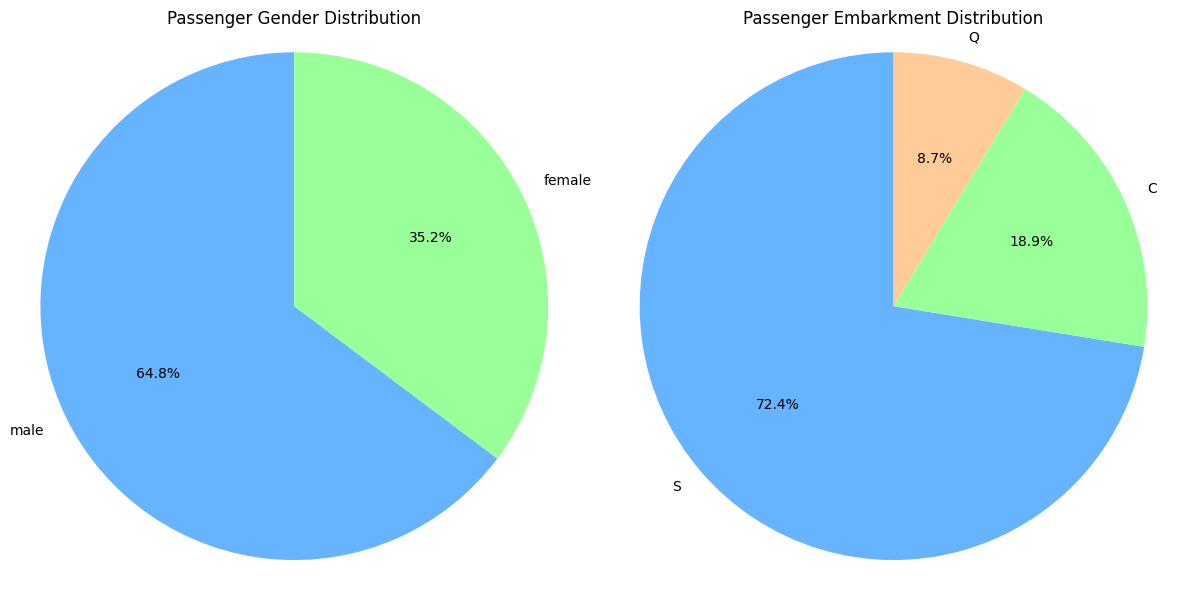

In [12]:
# @title #### Nominal Charts

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Warna untuk pie chart
colors = ['#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

# Pie chart untuk 'Sex'
sex_counts = df['Sex'].value_counts()
axes[0].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('Passenger Gender Distribution', fontsize=12)

# Pie chart untuk 'Embarked'
embarked_counts = df['Embarked'].value_counts()
axes[1].pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Passenger Embarkment Distribution', fontsize=12)

# Equal aspect ratio ensures that pie is drawn as a circle
axes[0].axis('equal')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

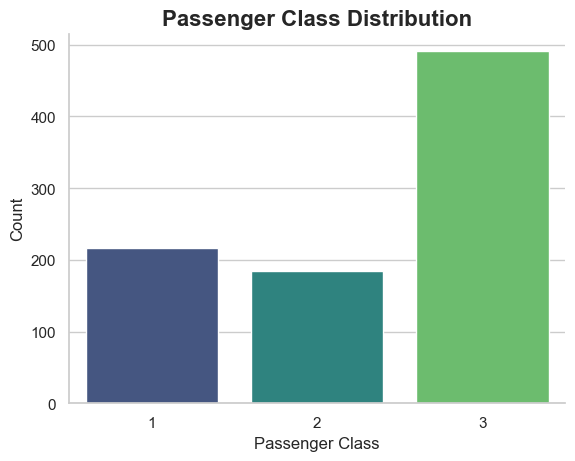

In [13]:
# @title #### Ordinal Charts

import warnings
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ax = sns.countplot(x='Pclass', data=df, order=[1, 2, 3], palette='viridis')

plt.title('Passenger Class Distribution', fontsize=16, fontweight='bold')

ax.set_xlabel('Passenger Class', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

sns.despine(ax=ax, top=True, right=True)

plt.show()

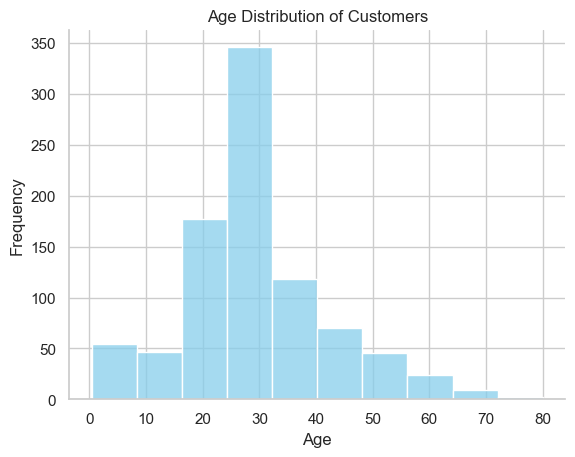

In [14]:
# @title #### Interval Charts

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
ax = sns.histplot(df['Age'].dropna(), bins=10, color='skyblue')
ax.set_title('Age Distribution of Customers')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
sns.despine(ax=ax, top=True, right=True)

plt.show()

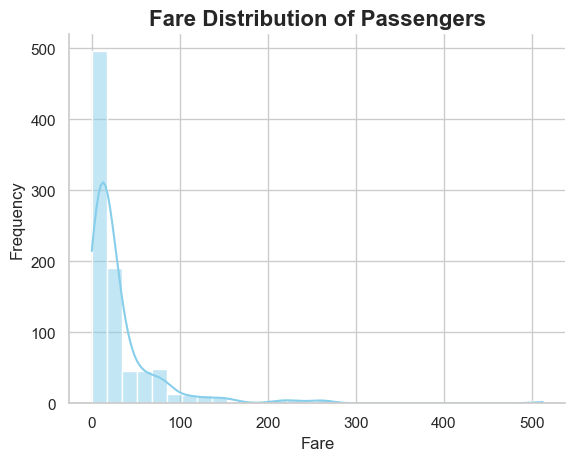

In [15]:
# @title #### Ratio Charts

import seaborn as sns
import matplotlib.pyplot as plt

# Atur style plot
sns.set_style("whitegrid")

# Buat plot
ax = sns.histplot(df['Fare'].dropna(), bins=30, color='skyblue', kde=True)

# Judul dan label dengan font yang besar dan tebal
ax.set_title('Fare Distribution of Passengers', fontsize=16, fontweight='bold')
ax.set_xlabel('Fare', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Hapus garis batas atas dan kanan
sns.despine(ax=ax, top=True, right=True)

plt.show()

Survival rates by fare quantiles:
 Fare_Category
Low            0.206731
Medium-Low     0.303571
Medium-High    0.454955
High           0.581081
Name: Survived, dtype: float64


/var/folders/s7/r9fnbpl50ybgw5n17052g04m0000gn/T/ipykernel_92398/894876655.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare_quantiles = df.groupby('Fare_Category')['Survived'].mean()


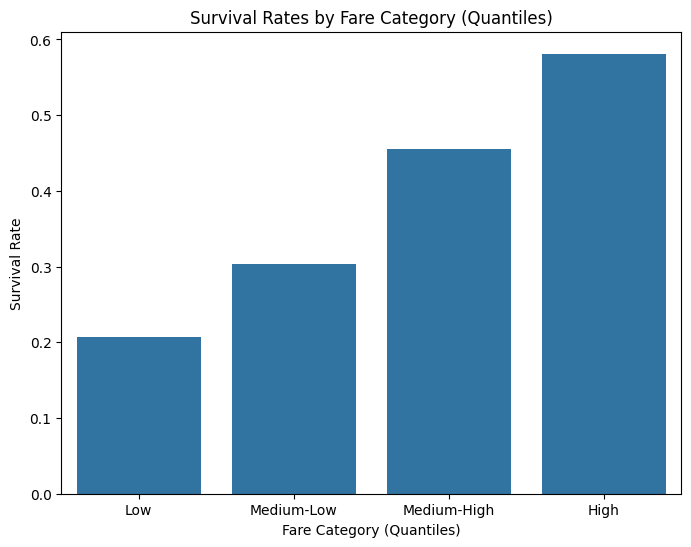

/var/folders/s7/r9fnbpl50ybgw5n17052g04m0000gn/T/ipykernel_92398/894876655.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare_categories = df.groupby('Fare_Category')['Survived'].mean()


Survival rates by custom fare categories:
 Fare_Category
Low            0.205607
Medium-Low     0.424581
Medium-High    0.416667
High           0.681250
Name: Survived, dtype: float64


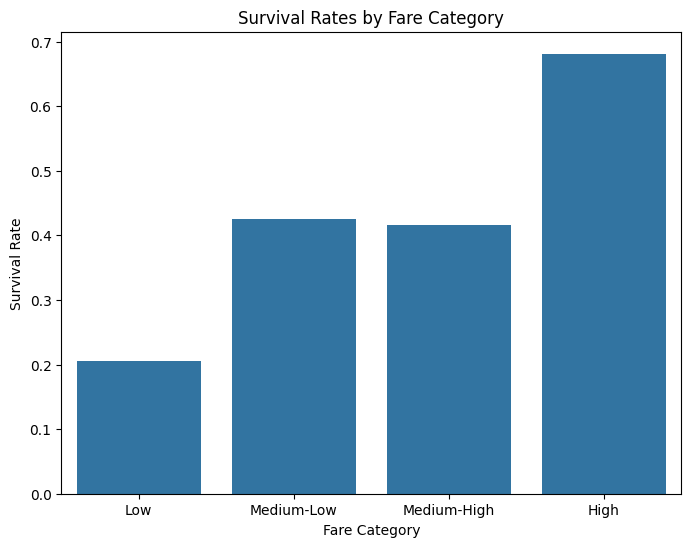

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'Fare' and 'Survived' columns
# Calculate survival rates for different fare categories

# Method 1: Using quantiles (quartiles, deciles, etc.)
fare_quantiles = df['Fare'].quantile([0.25, 0.5, 0.75])
df['Fare_Category'] = pd.cut(
    df['Fare'], 
    bins=[0] + list(fare_quantiles) + [df['Fare'].max()], 
    labels=['Low', 'Medium-Low', 'Medium-High', 'High']
)

survival_by_fare_quantiles = df.groupby('Fare_Category')['Survived'].mean()
print("Survival rates by fare quantiles:\n", survival_by_fare_quantiles)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_fare_quantiles.index, y=survival_by_fare_quantiles.values)
plt.xlabel('Fare Category (Quantiles)')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Fare Category (Quantiles)')
plt.show()

# Method 2: Using custom fare categories
df['Fare_Category'] = pd.cut(
    df['Fare'], 
    bins=[0, 10, 20, 50, df['Fare'].max()], 
    labels=['Low', 'Medium-Low', 'Medium-High', 'High']
)

survival_by_fare_categories = df.groupby('Fare_Category')['Survived'].mean()
print("Survival rates by custom fare categories:\n", survival_by_fare_categories)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_fare_categories.index, y=survival_by_fare_categories.values)
plt.xlabel('Fare Category')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Fare Category')
plt.show()